In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install researchpy
import researchpy
sns.set_style("dark")

In [4]:
train_df = pd.read_csv("train_clean.csv")
test_df = pd.read_csv("test_clean.csv")

# Basic EDA

Now, we will do some basic EDA for each variable

In [5]:
#Split the train dateset into 'Non Job-Seekers' and 'Job-Seekers'
train_0 = train_df[train_df['target']=='Non Job-Seekers']
train_1 = train_df[train_df['target']=='Job-Seekers']
#check for unique values
print(train_0['target'].unique())
print(train_1['target'].unique())

['Non Job-Seekers']
['Job-Seekers']


Text(0.5, 1.0, 'Non Job-Seekers')

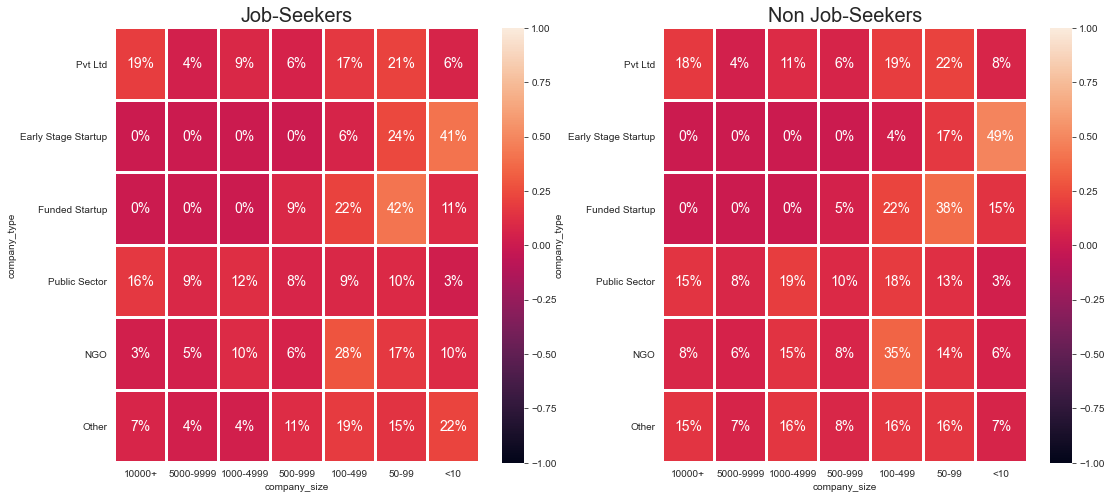

In [6]:
#Plot heatmap for company_type and company_size
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (18,8))

company_type_order = ['Pvt Ltd', 'Early Stage Startup', 'Funded Startup', 'Public Sector', 'NGO', 'Other']
company_size_order = ['10000+', '5000-9999', '1000-4999', '500-999', '100-499', '50-99', '<10']
temp3 = pd.crosstab(train_1['company_type'], train_1['company_size'], normalize='index').loc[company_type_order, company_size_order]
temp4 = pd.crosstab(train_0['company_type'], train_0['company_size'], normalize='index').loc[company_type_order, company_size_order]

sns.heatmap(data=temp3, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[0])
sns.heatmap(data=temp4, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[1])
ax[0].set_title('Job-Seekers', fontsize=20)
ax[1].set_title("Non Job-Seekers", fontsize=20)

In [7]:
temp4 = pd.crosstab(train_1['company_type'], train_1['company_size'])

In [8]:
temp4

company_size,10/49,100-499,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,No company
company_type,,,,,,,,,,
Early Stage Startup,35,8,0,0,30,0,0,51,0,0
Funded Startup,22,30,0,0,58,12,0,15,1,0
Missing,21,16,5,9,34,9,9,12,1594,0
NGO,10,25,9,3,15,5,4,9,8,0
No company,0,0,0,0,0,0,0,0,0,462
Other,3,5,1,2,4,3,1,6,2,0
Public Sector,17,17,23,32,19,15,17,5,50,0
Pvt Ltd,202,287,148,320,356,100,66,107,84,0


In [9]:
temp5 = pd.crosstab(train_0['company_type'], train_0['company_size'])

In [10]:
temp5

company_size,10/49,100-499,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,No company
company_type,,,,,,,,,,
Early Stage Startup,132,17,0,0,73,2,0,214,0,0
Funded Startup,166,184,0,0,318,42,0,124,3,0
Missing,68,114,48,60,170,47,21,45,1877,0
NGO,18,143,61,34,59,31,25,25,16,0
No company,0,0,0,0,0,0,0,0,0,848
Other,8,14,14,13,14,7,6,6,5,0
Public Sector,25,131,137,108,92,70,59,25,68,0
Pvt Ltd,665,1491,832,1380,1704,504,334,599,282,0


To indicate the strength of the association between two nominal variables, Cramér's V (Cramér, 1946) is often used.

As for the interpretation for Cramér's V various rules of thumb exist but one of them is from Cohen (1988, pp. 222, 224, 225) who lets the interpretation depend on the degrees of freedom, shown in the table below.

|df*|negligible|small|medium|large|
|-------|---|---|---|---|
|1|0 < .10|.10 < .30|.30 < .50|.50 or more|
|2|0 < .07|.07 < .21|.21 < .35|.35 or more|
|3|0 < .06|.06 < .17|.17 < .29|.29 or more|
|4|0 < .05|.05 < .15|.15 < .25|.25 or more|
|5|0 < .05|.05 < .13|.13 < .22|.22 or more|

The degrees of freedom (df*) is for Cramér's V the minimum of the number of rows, or number of columns, then minus one.



In [11]:
# to find the strength of association between company type and company size for job-seekers

In [12]:
crosstab, res = researchpy.crosstab(train_1['company_type'], train_1['company_size'], test='chi-square')

In [13]:
res

,Chi-square test,results
0,Pearson Chi-square ( 63.0) =,8483.0498
1,p-value =,0.0000
2,Cramer's V =,0.5240


In [14]:
degreefreedom = min(temp4.shape[0], temp4.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and company size for job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.524
The strength of association between company type and company size for job seekers is large


In [15]:
# to find the strength of association between company type and company size for non job-seekers

In [16]:
crosstab, res = researchpy.crosstab(train_0['company_type'], train_0['company_size'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 63.0) =,23759.1056
1,p-value =,0.0000
2,Cramer's V =,0.5000


In [17]:
degreefreedom = min(temp5.shape[0], temp5.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and company size for non-job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.5
The strength of association between company type and company size for non-job seekers is large


In [18]:
train_df['last_new_job'].unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

[Text(0.5, 1.0, 'last new job distribution')]

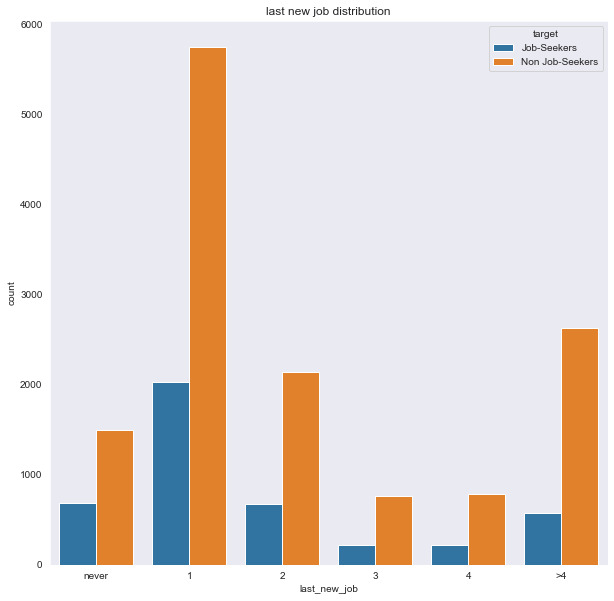

In [19]:
#Plot countplot for last_new_job distribution
plt.figure(figsize=(10, 10))
last_new_job_order = ['never', '1', '2', '3','4','>4']
sns.countplot(x = "last_new_job", data = train_df, hue = "target", order = last_new_job_order).set(title='last new job distribution')

<Figure size 1296x720 with 0 Axes>

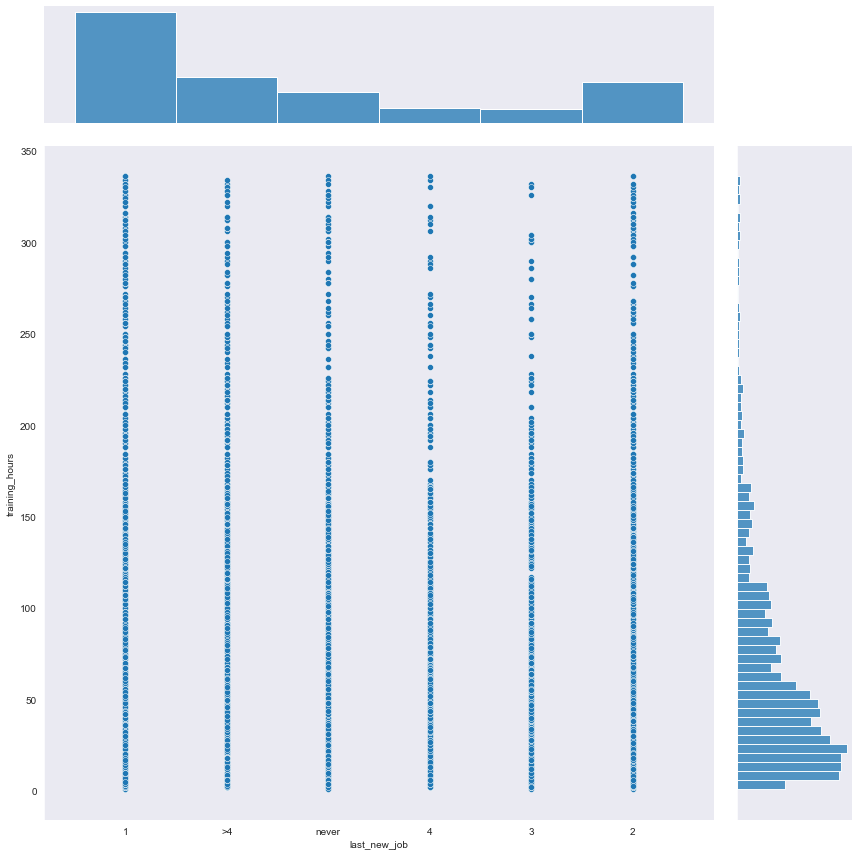

In [20]:
#plot jointplot of last_new_job and training_hours
plt.figure(figsize = (18, 10))
sns.jointplot(data = train_df, x = "last_new_job", y = "training_hours", height = 12)

In [21]:
set=train_1['experience'].unique()

In [22]:
for i in set:
    print(i)
exp_order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']

>20
11
13
7
2
4
14
18
6
9
5
19
15
10
<1
3
8
12
20
1
17
16


Text(0.5, 1.0, 'Non Job-Seekers')

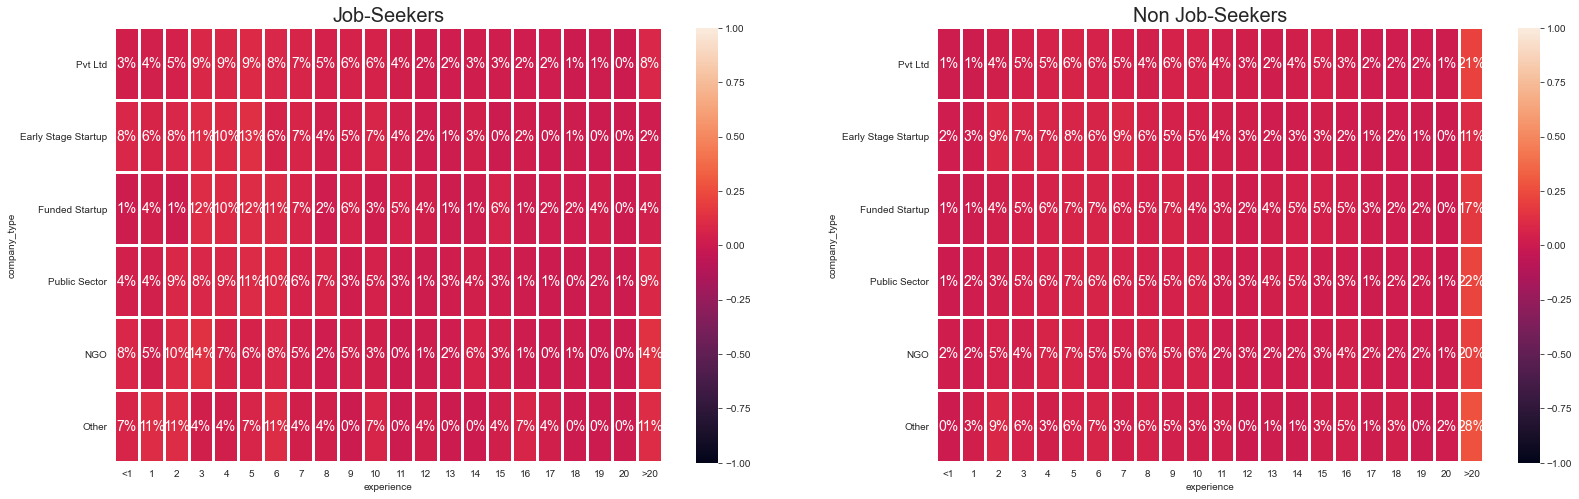

In [23]:
#Plot heatmap for company_type and experience
f, ax = plt.subplots(nrows = 1,ncols = 2, figsize = (27,8))

company_type_order = ['Pvt Ltd', 'Early Stage Startup', 'Funded Startup', 'Public Sector', 'NGO', 'Other']
exp_order=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
temp6 = pd.crosstab(train_1['company_type'], train_1['experience'], normalize='index').loc[company_type_order, exp_order]
temp7 = pd.crosstab(train_0['company_type'], train_0['experience'], normalize='index').loc[company_type_order, exp_order]

sns.heatmap(data=temp6, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[0])
sns.heatmap(data=temp7, linewidths=.1, vmin=-1, vmax=1, linewidth=2, annot=True, fmt='1.0%',annot_kws={"fontsize":14}, ax = ax[1])
ax[0].set_title('Job-Seekers', fontsize=20)
ax[1].set_title("Non Job-Seekers", fontsize=20)

In [24]:
# to find the strength of association between company type and experience

In [25]:
temp6=pd.crosstab(train_1['company_type'], train_1['experience'])
temp6

experience,1,10,11,12,13,14,15,16,17,18,...,20,3,4,5,6,7,8,9,<1,>20
company_type,,,,,,,,,,,,,,,,,,,,,
Early Stage Startup,8,9,5,2,1,4,0,3,0,1,...,0,14,12,16,7,9,5,6,10,2
Funded Startup,5,4,7,5,2,2,8,2,3,3,...,0,16,14,16,15,10,3,8,2,6
Missing,64,69,62,32,25,36,46,20,23,17,...,23,143,165,128,111,103,65,56,69,303
NGO,4,3,0,1,2,5,3,1,0,1,...,0,12,6,5,7,4,2,4,7,12
No company,41,9,7,2,2,1,2,4,1,3,...,2,69,56,42,30,32,9,20,50,4
Other,3,2,0,1,0,0,1,2,1,0,...,0,1,1,2,3,1,1,0,2,3
Public Sector,8,10,5,2,5,7,6,2,1,0,...,1,16,17,21,19,11,13,6,8,17
Pvt Ltd,67,96,62,40,36,46,45,31,27,13,...,7,156,146,157,134,120,86,98,57,138


In [26]:
temp7=pd.crosstab(train_0['company_type'], train_0['experience'])
temp6

experience,1,10,11,12,13,14,15,16,17,18,...,20,3,4,5,6,7,8,9,<1,>20
company_type,,,,,,,,,,,,,,,,,,,,,
Early Stage Startup,8,9,5,2,1,4,0,3,0,1,...,0,14,12,16,7,9,5,6,10,2
Funded Startup,5,4,7,5,2,2,8,2,3,3,...,0,16,14,16,15,10,3,8,2,6
Missing,64,69,62,32,25,36,46,20,23,17,...,23,143,165,128,111,103,65,56,69,303
NGO,4,3,0,1,2,5,3,1,0,1,...,0,12,6,5,7,4,2,4,7,12
No company,41,9,7,2,2,1,2,4,1,3,...,2,69,56,42,30,32,9,20,50,4
Other,3,2,0,1,0,0,1,2,1,0,...,0,1,1,2,3,1,1,0,2,3
Public Sector,8,10,5,2,5,7,6,2,1,0,...,1,16,17,21,19,11,13,6,8,17
Pvt Ltd,67,96,62,40,36,46,45,31,27,13,...,7,156,146,157,134,120,86,98,57,138


In [27]:
# to find the strength of association between company type and experience for job seekers

In [28]:
crosstab, res = researchpy.crosstab(train_1['company_type'], train_1['experience'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 147.0) =,510.0116
1,p-value =,0.0000
2,Cramer's V =,0.1285


In [29]:
degreefreedom = min(temp6.shape[0], temp6.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and experience for job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.1285
The strength of association between company type and experience for job seekers is small


In [30]:
crosstab, res = researchpy.crosstab(train_0['company_type'], train_0['experience'], test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 147.0) =,1407.1288
1,p-value =,0.0000
2,Cramer's V =,0.1217


In [31]:
degreefreedom = min(temp7.shape[0], temp7.shape[1]) - 1
print("The degree of freedom is",degreefreedom)
V = res.iloc[2,1]
print("Cramer's V is",V)
if degreefreedom == 1:
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 2:
    if V < 0.07:
        qual = 'negligible'
    elif V < 0.21:
        qual = 'small'
    elif V < 0.35:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 3:
    if V < 0.06:
        qual = 'negligible'
    elif V < 0.17:
        qual = 'small'
    elif V < 0.29:
        qual = 'medium'
    else:
        qual = 'large'
elif degreefreedom == 4:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.15:
        qual = 'small'
    elif V < 0.25:
        qual = 'medium'
    else:
        qual = 'large'
else:
    if V < 0.05:
        qual = 'negligible'
    elif V < 0.13:
        qual = 'small'
    elif V < 0.22:
        qual = 'medium'
    else:
        qual = 'large'

print("The strength of association between company type and experience for non-job seekers is "+qual)

The degree of freedom is 7
Cramer's V is 0.1217
The strength of association between company type and experience for non-job seekers is small
